## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 435s 3us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train[0].shape

(32, 32, 3)

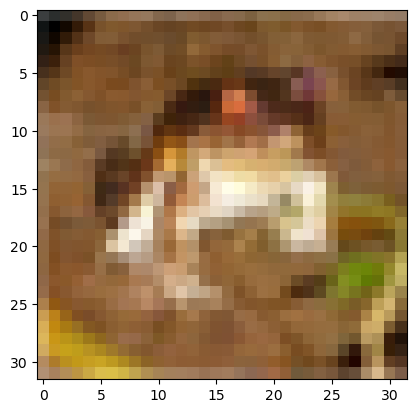

In [10]:
plt.imshow(x_train[0])

In [11]:
import matplotlib.pyplot as plt

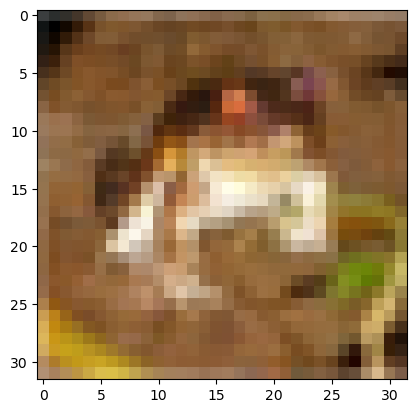

In [12]:
# FROG
plt.imshow(x_train[0])

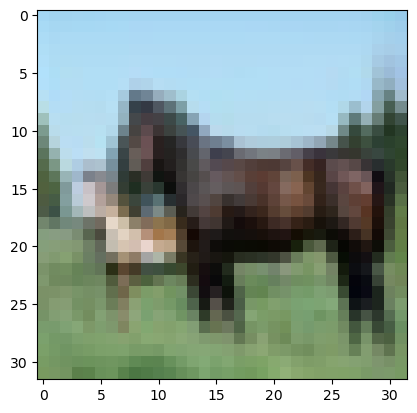

In [13]:
# HORSE
plt.imshow(x_train[12])

## PreProcessing

In [14]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
x_train[0].shape

(32, 32, 3)

In [16]:
x_train[0].max()

255

In [17]:
x_train = x_train/255

In [18]:
x_test = x_test/255

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_test.shape

(10000, 32, 32, 3)

In [21]:
x_train[0].min()

0.0

## Labels

In [51]:
from tensorflow.keras.utils import to_categorical

In [52]:
y_train.shape

(50000, 1)

In [53]:
y_train[0]

array([6], dtype=uint8)

In [54]:
y_cat_train = to_categorical(y_train,10)

In [55]:
y_cat_train.shape

(50000, 10)

In [56]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [57]:
y_cat_test = to_categorical(y_test,10)

## Buiding the Model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [59]:
model = Sequential()

# FIRST SET OF LAYERS 

# CONOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# SECOND SET OF LAYERS

# CONOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN MAGES FROM 28 BY 28 TO 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Train the Model

In [63]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10


1563/1563 [==============================] - 40s 24ms/step - loss: 1.5264 - accuracy: 0.4547 - val_loss: 1.2784 - val_accuracy: 0.5491
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1708 - accuracy: 0.5871 - val_loss: 1.0829 - val_accuracy: 0.6228
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.0135 - accuracy: 0.6471 - val_loss: 0.9998 - val_accuracy: 0.6524
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9026 - accuracy: 0.6876 - val_loss: 1.0409 - val_accuracy: 0.6553
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8165 - accuracy: 0.7185 - val_loss: 1.0403 - val_accuracy: 0.6516
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7436 - accuracy: 0.7466 - val_loss: 1.0918 - val_accuracy: 0.6539


## Evaluation the Model

In [64]:
losses = pd.DataFrame(model.history.history)

In [65]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.526394,0.45470,1.278418,0.5491
1,1.170833,0.58714,1.082888,0.6228
2,1.013506,0.64706,0.999825,0.6524
3,0.902648,0.68762,1.040918,0.6553
4,0.816484,0.71852,1.040306,0.6516


<Axes: >

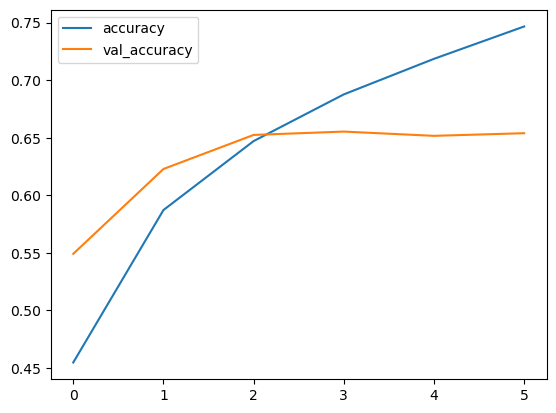

In [66]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

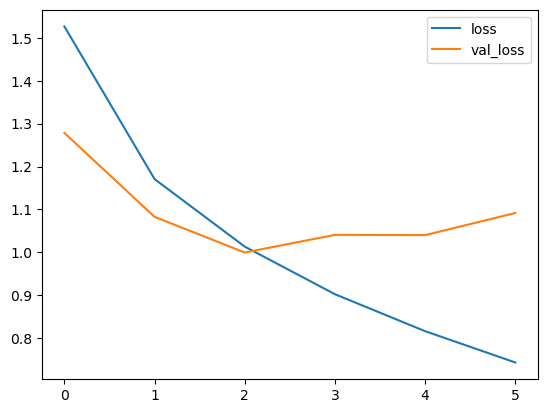

In [67]:
losses[['loss', 'val_loss']].plot()

In [68]:
model.metrics_names

['loss', 'accuracy']

In [69]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0918092727661133, 0.6539000272750854]


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 8ms/step


In [72]:
y_cat_test.shape

(10000, 10)

In [73]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [74]:
confusion_matrix(y_test,predictions)

array([[564,  17,  69,  52,  97,  27,  33,  13, 104,  24],
       [ 12, 711,  15,  32,  27,  23,  50,   7,  48,  75],
       [ 24,   2, 480,  78, 154, 114, 114,  20,  11,   3],
       [  7,   3,  37, 498, 106, 207, 106,  25,   7,   4],
       [  2,   1,  41,  56, 748,  50,  60,  31,  10,   1],
       [  2,   1,  26, 189,  91, 601,  47,  39,   3,   1],
       [  2,   0,  16,  50,  53,  25, 849,   4,   0,   1],
       [  4,   0,  20,  52, 147, 122,  22, 630,   1,   2],
       [ 23,  23,  13,  38,  29,  18,  26,  12, 794,  24],
       [ 19,  68,  11,  57,  30,  41,  42,  29,  39, 664]], dtype=int64)

<Axes: >

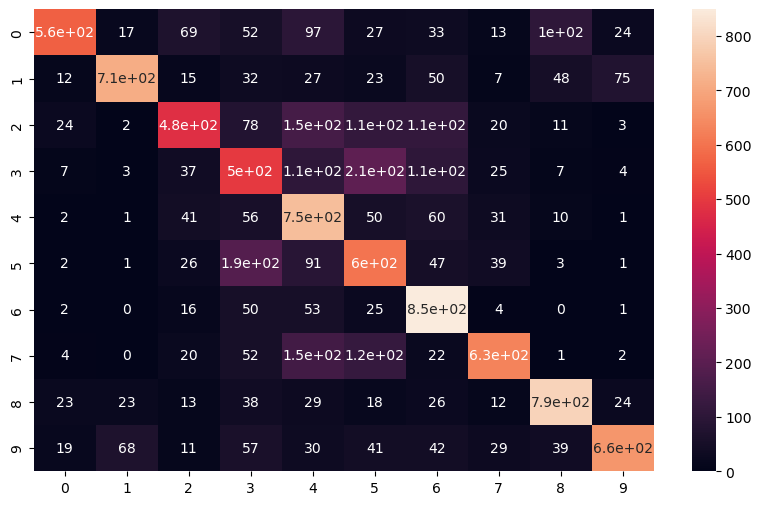

In [75]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68      1000
           1       0.86      0.71      0.78      1000
           2       0.66      0.48      0.56      1000
           3       0.45      0.50      0.47      1000
           4       0.50      0.75      0.60      1000
           5       0.49      0.60      0.54      1000
           6       0.63      0.85      0.72      1000
           7       0.78      0.63      0.70      1000
           8       0.78      0.79      0.79      1000
           9       0.83      0.66      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.66     10000
weighted avg       0.68      0.65      0.66     10000



## Predicting a Given Image

In [77]:
my_image = x_test[10]

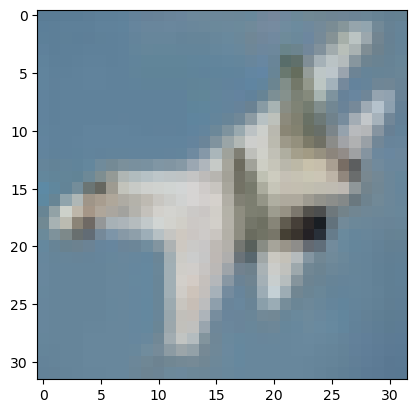

In [78]:
plt.imshow(my_image)

In [79]:
y_test[0]

array([3], dtype=uint8)

In [80]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 29ms/step


array([[3.2064315e-02, 2.4119088e-05, 2.9787224e-02, 1.0375485e-01,
        7.5312960e-01, 6.5338254e-02, 2.5785856e-03, 1.1840936e-02,
        1.2947223e-03, 1.8747046e-04]], dtype=float32)

In [81]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=1)

1/1 [==============================] - 0s 27ms/step


array([4], dtype=int64)

## Good Job!